In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
player_dataset_import = pd.read_csv('./players.csv')

In [3]:
player_dataset_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [4]:
player_dataset_import['height in inches'] = player_dataset_import['height'].apply(lambda x: int(x.split('-')[0])*12+ int(x.split('-')[1]) if len(x.split('-'))==2 else int(x))
player_dataset_import


,nflId,height,weight,birthDate,collegeName,Position,displayName,height in inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

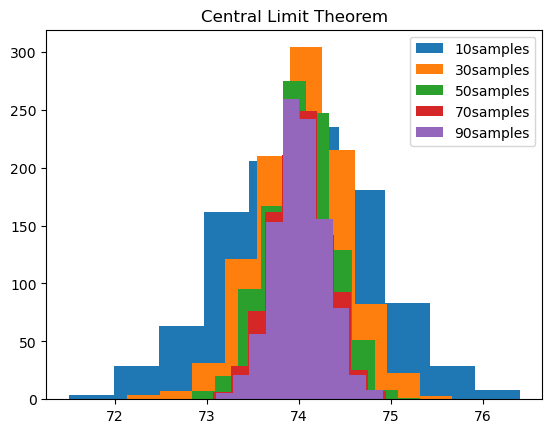

In [5]:
sample_amount = range(10,100,20)
for x in sample_amount:
    sample=[]
    for i in range(1000):
        sample.append(player_dataset_import['height in inches'].sample(x).mean())
    plt.hist(sample)
plt.legend([str(z)+ "samples" for z in sample_amount])
plt.title("Central Limit Theorem")

In [6]:
player_dataset_import['height in inches'].sem()

0.05065243293253027

In [7]:
from sklearn.utils import resample
result = []
for nrepeat in range(1000):
    sample = resample(player_dataset_import['height in inches'])
    result.append(sample.mean())
result = pd.Series(result)
print('Bootstrap Statistics :')
print(f'original: {player_dataset_import["height in inches"].mean()}')
print(f'Bias : {result.mean()-player_dataset_import["height in inches"].mean()}')
print(f'Standard Error : {result.std()}')

Bootstrap Statistics :
original: 74.0106149341142
Bias : -0.0008206442166880379
Standard Error : 0.05203255302803458


##Confidence interval

In [8]:
import scipy.stats as st
import numpy as np

#define sample data
data = player_dataset_import['height in inches'].sample(20)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df= len(data)-1,loc=np.mean(data),scale=st.sem(data) )

C:\Users\anish\AppData\Local\Temp\ipykernel_10352\2136107876.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df= len(data)-1,loc=np.mean(data),scale=st.sem(data) )


(73.4196396413411, 75.9803603586589)

In [9]:
np.random.seed(0)
data = player_dataset_import['height in inches'].sample(1500)
st.norm.interval(alpha=0.95,loc=np.mean(data),scale=st.sem(data) )    

C:\Users\anish\AppData\Local\Temp\ipykernel_10352\736151078.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha=0.95,loc=np.mean(data),scale=st.sem(data) )


(73.92590128473445, 74.19009871526556)

#Normal/Guassian Distribution


((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

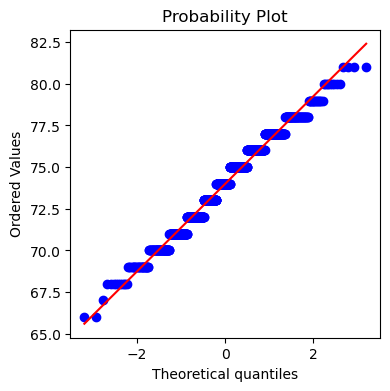

In [11]:

fig, ax = plt.subplots(figsize=(4,4))
norm_sample =player_dataset_import['height in inches'].sample(1000)
st.probplot(norm_sample,plot=ax)